# 🌟 Skin Disease Detection Using Pre-trained DenseNet201 🌟  

Leveraging the power of **Deep Learning**, this project utilizes the **pre-trained `DenseNet201` model** to accurately detect and classify skin diseases. By harnessing **transfer learning**, we enhance model performance while reducing computational costs. 🚀  

## 🔬 Key Features  
✅ **State-of-the-Art CNN** – Uses **DenseNet201** for feature extraction  
✅ **Transfer Learning** – Improves efficiency and accuracy  
✅ **Multi-class Skin Disease Detection** – Capable of identifying various conditions  
✅ **Optimized Model Performance** – Fine-tuned for real-world applicability  

## 🔥 Why DenseNet201?  
DenseNet201 is an advanced deep learning model known for:  
🔹 **Deep connectivity** – Efficient flow of information across layers  
🔹 **Fewer parameters** – Reducing computational cost without sacrificing accuracy  
🔹 **Superior feature extraction** – Captures intricate skin patterns for precise classification  

## 🚀 Project Overview  
This project involves:  
1️⃣ **Data Preprocessing** – Image augmentation and normalization  
2️⃣ **Model Fine-Tuning** – Adapting `DenseNet201` for skin disease classification  
3️⃣ **Evaluation & Analysis** – Assessing model performance with key metrics  

## 📌 Technologies Used  
- **Python** 🐍  
- **PyTorch** 🔥  
- **Matplotlib** 🖼  
- **Pandas & NumPy** 📊  

## 💡 Future Enhancements  
🔸 Deploy as a **web application** for easy accessibility  
🔸 Improve model accuracy with **additional datasets**  
🔸 Integrate with **real-time image analysis**  

---

🎯 **Empowering Healthcare with AI!** 🏥💡 Let's revolutionize skin disease detection together!  


## Getting the Dataset

In [125]:
!pip install kaggle
!kaggle datasets download -d "subirbiswas19/skin-disease-dataset"

Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0
 40% 7.00M/17.3M [00:00<00:00, 63.2MB/s]
100% 17.3M/17.3M [00:00<00:00, 109MB/s] 


## 📌 Importing Required Libraries  

Before starting the **Skin Disease Detection** project, we need to import essential libraries for:  
✅ **Data Handling** – Working with files, paths, and datasets  
✅ **Image Processing** – Loading and visualizing images  
✅ **Deep Learning** – Model training and evaluation  

### 🔗 Libraries Used:  
- `os` – For file and directory operations  
- `pathlib` – Handling file paths  
- `zipfile` – Extracting dataset files  
- `numpy` – Numerical operations  
- `matplotlib.pyplot` – Data visualization  
- `torch` – Deep learning framework  
- `torchvision.transforms` – Data transformations for training  

---

📂 **Ensuring all dependencies are ready before moving forward!** 🚀  

In [126]:
# 📂 OS and Path Handling
import os  # For interacting with the operating system (file handling, directory operations)
import pathlib  # For handling file and directory paths
import zipfile  # For extracting compressed dataset files

# 📊 Data Processing and Visualization
import pandas as pd  # For handling structured data (CSV, tables)
import numpy as np  # For numerical computations and array operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs and displaying images

# 🔥 Deep Learning (PyTorch)
import torch  # PyTorch framework for deep learning
import torchvision  # PyTorch utilities for image processing and models
from torch import nn  # Neural network module for defining deep learning models
from torch.utils.data import DataLoader  # For loading datasets efficiently
from torchvision import datasets, transforms, models  # Preprocessing, datasets, and pretrained models

# ⏳ Performance Tracking
from timeit import default_timer as timer  # To measure execution time
from tqdm.auto import tqdm  # For progress bars in loops (useful in training and data processing)

# 🖼️ Image Processing
import PIL  # Python Imaging Library for working with images
from PIL import Image  # Handling and manipulating image files

# 📜 Type Hints and Randomization
from typing import Dict, List  # Type hints for better code readability
import random  # For random sampling and seeding

# ✅ Essential libraries imported for data processing, visualization, deep learning, and performance tracking!

## 📂 Dataset Setup & Extraction  

This section handles the **setup and extraction** of the **Skin Disease Dataset**. It ensures that the dataset directory is created and extracts the images for further processing.  

### 🛠 Steps Involved  
1️⃣ **Check for existing dataset directory**  
2️⃣ **Create the necessary folder structure** if it doesn’t exist  
3️⃣ **Extract the dataset** from the ZIP file  
4️⃣ **Remove the ZIP file** after extraction  

### 🔍 Code Breakdown  
- **`pathlib.Path`**: Manages file paths efficiently  
- **`zipfile.ZipFile`**: Handles dataset extraction  
- **`os.remove`**: Deletes the ZIP file after successful extraction  

---

⚡ **Dataset Extraction Process:**
- If the dataset directory exists, the script **skips extraction**  
- Otherwise, it **creates the directory and unzips the dataset**  
- After successful extraction, the ZIP file is **removed** to save space  

---

✅ **Ensuring a smooth data setup for training!** 🚀  


In [127]:
# Define the base data directory
data_path = pathlib.Path("data/")

# Define the path where images will be stored
image_path = data_path / "images"

# Check if the image directory exists, if not, create it
if image_path.is_dir():
    print(f"Directory already exists...")  # Notify if directory already exists
else:
    print(f"Making new directory : {image_path}")
    image_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist

# Open and extract the ZIP file containing the dataset
with zipfile.ZipFile("skin-disease-dataset.zip", 'r') as zip_ref:
    print("Unzipping the dataset....")  # Indicate the unzipping process is starting
    try:
        zip_ref.extractall(image_path)  # Extract files into the designated directory
    except Exception as e:
        print("Dataset is not found!!")  # Handle error if extraction fails
    else:
        print("Successfully unzipped the file")  # Confirm successful extraction

# Remove the ZIP file after extraction to free up space
os.remove("skin-disease-dataset.zip")

Directory already exists...
Unzipping the dataset....
Successfully unzipped the file


In [128]:
# Create a list of all image file paths in the dataset
# The pattern "*/*/*/*.jpg" ensures it searches 4 levels deep inside image_path for .jpg files
image_list = list(image_path.glob("*/*/*/*.jpg"))

# Print the total number of images found in the dataset
len(image_list)

1031

Image height: 229
Image width : 229
Image shape: (229, 229, 3)


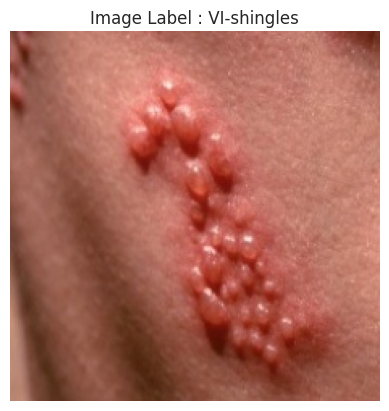

In [129]:
# Select the first image from the image list
first_image_path = image_list[0]

# Open the image using PIL (Pillow)
with Image.open(first_image_path) as image_1:
    # Print image dimensions (height and width)
    print(f"Image height: {image_1.height}")
    print(f"Image width : {image_1.width}")

    # Extract the label (folder name) of the image
    image_label = first_image_path.parent.stem

    # Convert the image into a NumPy array for further processing
    image_in_numpy = np.asarray(image_1)

    # Print the shape of the image array
    print(f"Image shape: {image_in_numpy.shape}")

    # Display the image using Matplotlib
    plt.imshow(image_in_numpy)
    plt.title(f"Image Label : {image_label}")  # Set title as the image label
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

## 🖼️ **Display Random Images from Dataset**  

This function **randomly selects and displays images** from a given list. It is useful for **visualizing** dataset samples before training a deep learning model.  

### 🔍 **Function Details**  

### 📸 `display_random_image(image_list, number_of_images, seed=None)`  

#### 📌 **Description**  
Randomly selects and displays a specified number of images from a dataset. If more than **10 images** are requested, it limits the display to **10** for readability.  

#### 🛠️ **Parameters**  

| Parameter          | Type       | Description |
|--------------------|-----------|-------------|
| `image_list`      | `List`     | A list containing file paths of images. |
| `number_of_images` | `int`      | Number of images to display (max **10**). |
| `seed` *(optional)* | `int`  | Random seed for reproducibility (default: `None`). |

#### 🔄 **Returns**  
- **`None`**: Displays images using `matplotlib` but does not return any value.  

In [130]:
def display_random_image(image_list: List, number_of_images: int, seed=None):
    """
    Display a random selection of images from a given list.

    This function randomly selects and displays a specified number of images
    from a provided list of image file paths. If a seed is given, the randomness
    is controlled for reproducibility.

    Parameters:
    -----------
    image_list : List
        A list containing file paths to images.

    number_of_images : int
        The number of images to randomly select and display.
        If more than 10 is requested, it is capped at 10 to prevent excessive display.

    seed : int, optional
        A seed value for randomization to ensure consistent results (default is None).

    Returns:
    --------
    None
        The function does not return any value but displays images.

    Notes:
    ------
    - Uses `torch.manual_seed()` if a seed value is provided.
    - Uses `random.sample()` to randomly select images.
    - Uses `PIL.Image.open()` to open and `matplotlib.pyplot` to display images.

    Example Usage:
    --------------
    ```python
    image_paths = ["image1.jpg", "image2.jpg", "image3.jpg"]
    display_random_image(image_paths, number_of_images=3, seed=42)
    ```
    """

    if seed:
        torch.manual_seed(seed=seed)

    # Cap the number of images at 10 to prevent excessive display
    if number_of_images > 10:
        number_of_images = 10

    # Randomly select images from the list
    random_image_list = random.sample(image_list, k=number_of_images)

    print(f"Printing random {number_of_images} images from the dataset")

    # Iterate through selected images and display them
    for i, image_path in enumerate(random_image_list):
        with Image.open(image_path) as image:
            image_as_numpy = np.asarray(image)
            plt.imshow(image)
            plt.title(f"{image_path.parent.stem}")  # Display folder name as title
            plt.axis("off")
            plt.tight_layout()
            plt.show()

Printing random 5 images from the dataset


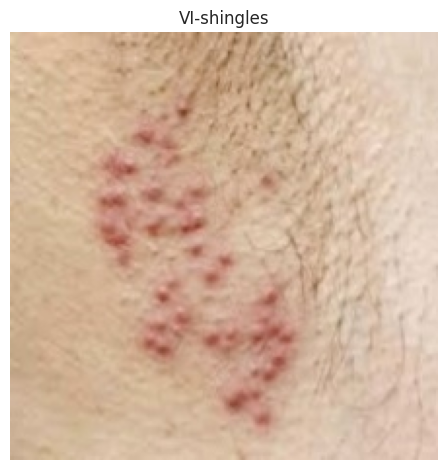

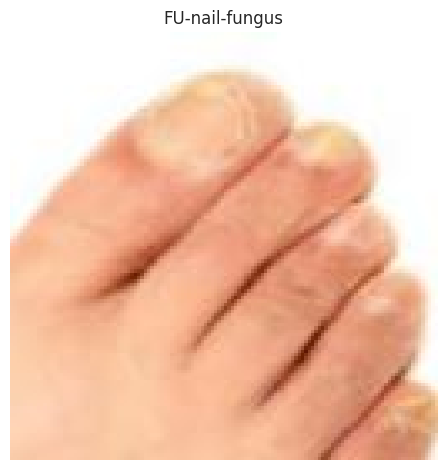

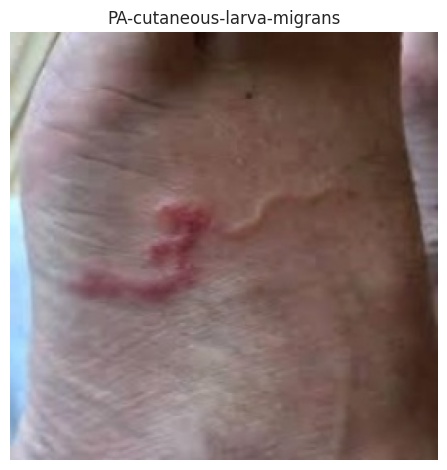

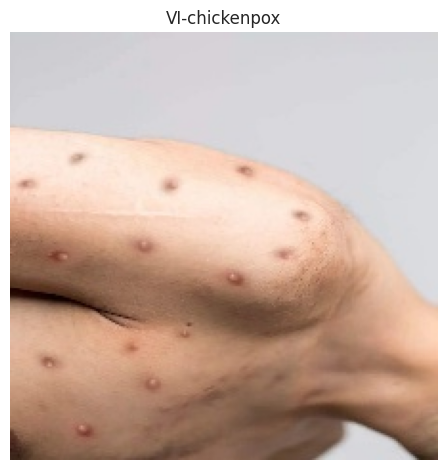

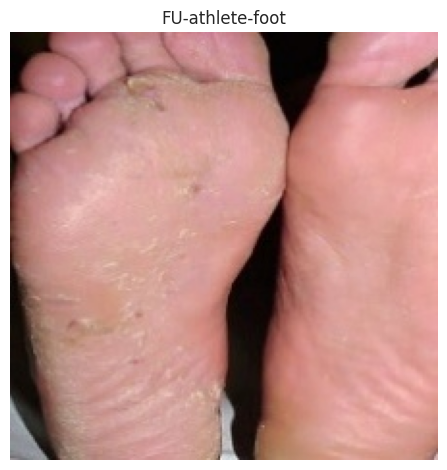

In [131]:
# Displaying Images
display_random_image(image_list=image_list, number_of_images=5)

In [132]:
# Getting the right device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 🛠️ Data Setup Function  

The `data_setup` function is responsible for **loading and preparing the dataset** for training and testing. It applies **transformations**, creates **DataLoaders**, and ensures efficient data processing.

### 🔍 Function Overview  
- **Loads images** from training and testing directories  
- **Applies transformations** to standardize data  
- **Creates DataLoaders** for efficient batch processing  
- **Uses multiprocessing** for faster data loading  
- **Ensures reproducibility** with an optional seed  

### 📌 Parameters  
| Parameter       | Type      | Description |
|----------------|----------|-------------|
| `train_dir`    | `str`    | Path to the training dataset directory |
| `test_dir`     | `str`    | Path to the testing dataset directory |
| `BATCH_SIZE`   | `int`    | Number of samples per batch |
| `image_transforms` | `transforms` | Image transformations for preprocessing |
| `train_shuffle` | `bool` (default: `True`) | Whether to shuffle training data |
| `seed`         | `bool` (default: `None`) | Random seed for reproducibility |

### 🚀 Returns  
- **`class_names`** – List of class names from the dataset  
- **`train_dataloader`** – PyTorch DataLoader for training  
- **`test_dataloader`** – PyTorch DataLoader for testing  

### ⚡ Key Features  
✅ **Efficient Data Loading** – Uses `os.cpu_count()` to maximize CPU usage  
✅ **Batch Processing** – Loads data in batches to optimize training  
✅ **Shuffle Control** – Improves generalization by shuffling training data  
✅ **Reproducibility** – Optional seed ensures consistent results  

---

📂 **Prepares data efficiently for training and evaluation!** 🚀

In [133]:
def data_setup(
    train_dir: str,
    test_dir: str,
    BATCH_SIZE: int,
    image_transforms: transforms,
    train_shuffle: bool = True,
    seed: bool = None
):
    """
    Prepares the dataset for training and testing.

    This function loads images from the specified directories, applies transformations,
    and creates DataLoader objects for training and testing.

    Args:
        train_dir (str): Path to the training dataset directory.
        test_dir (str): Path to the testing dataset directory.
        BATCH_SIZE (int): Number of samples per batch for training and testing.
        image_transforms (transforms): Transformations to apply to the images.
        train_shuffle (bool, optional): Whether to shuffle the training data. Defaults to True.
        seed (bool, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        tuple: (class_names, train_dataloader, test_dataloader)
            - class_names (list): List of class names from the dataset.
            - train_dataloader (DataLoader): DataLoader for the training set.
            - test_dataloader (DataLoader): DataLoader for the testing set.
    """

    # Set the random seed for reproducibility (if provided)
    if seed:
        torch.manual_seed(seed=seed)

    # Load training and testing datasets using ImageFolder (automatically assigns labels)
    train_data = datasets.ImageFolder(root=train_dir, transform=image_transforms)
    test_data = datasets.ImageFolder(root=test_dir, transform=image_transforms)

    # Retrieve class names from the dataset
    class_names = train_data.classes

    # Create DataLoader for training set
    train_dataloader = DataLoader(
        dataset=train_data,
        batch_size=BATCH_SIZE,
        num_workers=os.cpu_count(),  # Use all available CPU cores for efficiency
        shuffle=train_shuffle,  # Shuffle training data for better generalization
    )

    # Create DataLoader for testing set
    test_dataloader = DataLoader(
        dataset=test_data,
        batch_size=BATCH_SIZE,
        num_workers=os.cpu_count(),  # Use all available CPU cores for efficiency
        shuffle=False,  # Do not shuffle test data to maintain consistency
    )

    # Return class names and DataLoaders
    return class_names, train_dataloader, test_dataloader

## 🕒 Execution Time and Accuracy Calculation  

This module provides two essential functions:  

1. **`total_time_taken(start, end, device)`**  
   - Computes the total time taken for execution on a specific device.
   - Useful for benchmarking deep learning models.

2. **`accuracy_function(y_true, y_pred)`**  
   - Calculates model accuracy by comparing predictions with ground truth labels.
   - Returns accuracy as a percentage.

---

### 🔍 **Function Details**  

### ⏳ `total_time_taken(start, end, device)`
#### 📌 Description:  
Calculates the execution time between a `start` and `end` timestamp and prints it.  

#### 🛠️ Parameters:  
| Parameter  | Type          | Description |
|------------|--------------|-------------|
| `start`    | `float`      | Start time in seconds |
| `end`      | `float`      | End time in seconds |
| `device`   | `torch.device` | The device (CPU/GPU) where execution took place |

#### 🔄 Returns:  
- **`float`**: Total execution time in seconds.  

In [134]:
def total_time_taken(start: float, end: float, device: torch.device) -> float:
    """
    Calculates and prints the total time taken for execution on a specific device.

    Args:
        start (float): The starting timestamp (in seconds).
        end (float): The ending timestamp (in seconds).
        device (torch.device): The device (CPU/GPU) on which execution took place.

    Returns:
        float: The total time taken in seconds.
    """
    # Compute the total elapsed time
    total_time = end - start

    # Print the execution time on the specified device
    print(f"Total time taken on {device} is: {total_time:.3f} seconds")

    return total_time


def accuracy_function(y_true: torch.Tensor, y_pred: torch.Tensor) -> float:
    """
    Computes the accuracy of predictions by comparing true labels with predicted labels.

    Args:
        y_true (torch.Tensor): The ground truth labels.
        y_pred (torch.Tensor): The predicted labels.

    Returns:
        float: The accuracy percentage of predictions.
    """
    # Count the number of correct predictions
    correct_predictions = torch.eq(y_true, y_pred).sum().item()

    # Compute accuracy as a percentage
    accuracy = (correct_predictions / len(y_true)) * 100

    return accuracy

## 🔥 Training, Testing, and Evaluation Module  

This module provides three essential functions for training, testing, and evaluating deep learning models in PyTorch:  

1. **`train_step(model, train_dataloader, optimizer, loss_fn, accuracy_function, device)`**  
   - Performs a single training epoch, updating model parameters.
   - Computes and returns the average training loss and accuracy.

2. **`test_step(model, test_dataloader, loss_fn, accuracy_function, device)`**  
   - Evaluates the trained model on test data.
   - Returns the average test loss and accuracy.

3. **`eval_step(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_function, epochs, device)`**  
   - Trains and evaluates the model for multiple epochs.
   - Returns a summary of training/testing performance and execution time.

---

## 🔍 **Function Details**  

### 🏋️‍♂️ `train_step(model, train_dataloader, optimizer, loss_fn, accuracy_function, device)`
#### 📌 Description:  
Performs a single **training step** (one epoch) on the provided model using the given dataset.  

#### 🛠️ Parameters:  
| Parameter          | Type                    | Description |
|--------------------|------------------------|-------------|
| `model`           | `torch.nn.Module`       | The neural network model to train. |
| `train_dataloader` | `DataLoader`            | DataLoader containing the training dataset. |
| `optimizer`       | `torch.optim.Optimizer` | Optimizer for model parameter updates. |
| `loss_fn`         | `torch.nn.CrossEntropyLoss` | Loss function for computing training loss. |
| `accuracy_function` | `function`              | Function to calculate accuracy. |
| `device`         | `torch.device`, optional | Device to use for training (CPU/GPU). |

#### 🔄 Returns:  
- **`tuple(float, float)`**:  
  - `train_loss`: Average loss over all batches.  
  - `train_acc`: Average accuracy over all batches.  


In [135]:
def train_step(model: torch.nn.Module,
               train_dataloader: DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.CrossEntropyLoss(),
               accuracy_function,
               device: torch.device = None):
    """
    Performs one epoch of training for a given model.

    Args:
        model (torch.nn.Module): The neural network model to be trained.
        train_dataloader (DataLoader): DataLoader for training data.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        loss_fn (torch.nn.CrossEntropyLoss): Loss function to compute training loss.
        accuracy_function (function): A function that calculates accuracy.
        device (torch.device, optional): The device (CPU/GPU) to run training on. Defaults to None.

    Returns:
        tuple: (train_loss, train_acc) - The average training loss and accuracy.
    """

    # Initialize loss and accuracy trackers
    train_loss, train_acc = 0, 0

    # Set model to training mode (enables gradients, dropout, batch norm updates)
    model.train()

    # Iterate over the training batches
    for batch, (X, y) in enumerate(train_dataloader):

        # Move data and labels to the specified device (GPU/CPU)
        X, y = X.to(device), y.to(device)

        # Forward pass: Compute predictions
        train_pred = model(X)

        # Compute loss between predictions and actual labels
        loss = loss_fn(train_pred, y)

        # Accumulate the total loss
        train_loss += loss.item()

        # Zero out previous gradients (important before calling .backward())
        optimizer.zero_grad()

        # Backpropagation: Compute gradients
        loss.backward()

        # Update model parameters based on gradients
        optimizer.step()

        # Compute and accumulate accuracy
        train_acc += accuracy_function(y_true=y, y_pred=train_pred.argmax(dim=1))

    # Compute the average loss and accuracy over all batches
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Print training progress
    print(f"Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc:.3f}")

    return train_loss, train_acc

## 🧪 `test_step(model, test_dataloader, loss_fn, accuracy_function, device)`
#### 📌 Description:  
Evaluates the model's performance on the test dataset by computing the average loss and accuracy.  

#### 🛠️ Parameters:  
| Parameter          | Type                    | Description |
|--------------------|------------------------|-------------|
| `model`           | `torch.nn.Module`       | The trained model to evaluate. |
| `test_dataloader` | `DataLoader`            | DataLoader containing the test dataset. |
| `loss_fn`         | `torch.nn.CrossEntropyLoss` | Loss function for computing test loss. |
| `accuracy_function` | `function`              | Function to calculate accuracy. |
| `device`         | `torch.device`, optional | Device to use for testing (CPU/GPU). |

#### 🔄 Returns:  
- **`tuple(float, float)`**:  
  - `test_loss`: Average test loss over all batches.  
  - `test_acc`: Average test accuracy over all batches.  


In [136]:
def test_step(model: torch.nn.Module,
              test_dataloader: DataLoader,
              loss_fn: torch.nn.CrossEntropyLoss(),
              accuracy_function,
              device: torch.device = None):
    """
    Evaluates the model on a test dataset.

    Args:
        model (torch.nn.Module): The trained neural network model.
        test_dataloader (DataLoader): DataLoader for test data.
        loss_fn (torch.nn.CrossEntropyLoss): Loss function to compute test loss.
        accuracy_function (function): A function that calculates accuracy.
        device (torch.device, optional): The device (CPU/GPU) to run evaluation on. Defaults to None.

    Returns:
        tuple: (test_loss, test_acc) - The average test loss and accuracy.
    """

    # Initialize loss and accuracy trackers
    test_loss, test_acc = 0, 0

    # Set model to evaluation mode (disables dropout, batch norm updates)
    model.eval()

    # Disable gradient computation for faster inference
    with torch.inference_mode():
        for X, y in test_dataloader:

            # Move data and labels to the specified device (GPU/CPU)
            X, y = X.to(device), y.to(device)

            # Forward pass: Compute predictions
            test_pred = model(X)

            # Compute loss between predictions and actual labels
            test_loss += loss_fn(test_pred, y).item()

            # Compute and accumulate accuracy
            test_acc += accuracy_function(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Compute the average loss and accuracy over all batches
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # Print test progress
    print(f"Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc:.3f}")

    return test_loss, test_acc

## 📊 `eval_step(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_function, epochs, device)`
#### 📌 Description:  
Trains and evaluates a deep learning model over multiple epochs, tracking both training and test performance.

#### 🛠️ Parameters:  
| Parameter          | Type                    | Description |
|--------------------|------------------------|-------------|
| `model`           | `torch.nn.Module`       | The model to be trained and evaluated. |
| `train_dataloader` | `DataLoader`           | DataLoader containing the training dataset. |
| `test_dataloader`  | `DataLoader`           | DataLoader containing the test dataset. |
| `loss_fn`         | `torch.nn.CrossEntropyLoss` | Loss function used for optimization. |
| `optimizer`       | `torch.optim.Optimizer` | Optimizer for updating model parameters. |
| `accuracy_function` | `function`             | Function to calculate accuracy. |
| `epochs`          | `int`                   | Number of training epochs. |
| `device`         | `torch.device`, optional | Device to use for training and evaluation (CPU/GPU). |

#### 🔄 Returns:  
- **`dict`**: A summary containing:  
  - `"Model Name"`: Name of the model class.  
  - `"Epochs"`: Total number of epochs trained.  
  - `"Device"`: The device used (CPU/GPU).  
  - `"Train Losses"`: List of training loss values per epoch.  
  - `"Train Accuracy"`: List of training accuracy values per epoch.  
  - `"Average Train Loss"`: Mean of all training loss values.  
  - `"Average Train Accuracy"`: Mean of all training accuracy values.  
  - `"Test Losses"`: List of test loss values per epoch.  
  - `"Test Accuracy"`: List of test accuracy values per epoch.  
  - `"Average Test Loss"`: Mean of all test loss values.  
  - `"Average Test Accuracy"`: Mean of all test accuracy values.  
  - `"Total Time Taken"`: Total execution time for training and testing.  



In [137]:
def eval_step(model: torch.nn.Module,
              train_dataloader: DataLoader,
              test_dataloader: DataLoader,
              loss_fn: torch.nn.CrossEntropyLoss(),
              optimizer: torch.optim.Optimizer,
              accuracy_function,
              epochs: int = None,
              device: torch.device = None):
    """
    Evaluates the given model by training and testing it over multiple epochs.

    Args:
        model (torch.nn.Module): The neural network model to train and evaluate.
        train_dataloader (DataLoader): DataLoader for the training dataset.
        test_dataloader (DataLoader): DataLoader for the testing dataset.
        loss_fn (torch.nn.CrossEntropyLoss): Loss function for computing training and testing loss.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        accuracy_function (function): Function to calculate accuracy.
        epochs (int, optional): Number of epochs for training. Defaults to None.
        device (torch.device, optional): The device (CPU/GPU) on which computations are performed. Defaults to None.

    Returns:
        dict: A summary containing model name, epochs, device, training/testing losses, accuracy, and total time taken.
    """

    # Set a manual seed for reproducibility
    torch.manual_seed(42)

    # Initialize loss and accuracy tracking variables
    train_loss, train_acc, test_loss, test_acc = 0, 0, 0, 0

    # Lists to store loss and accuracy over epochs
    train_losses, train_accuracy, test_losses, test_accuracy = [], [], [], []

    # Start measuring time for total execution
    time_start = timer()

    # Loop through the number of epochs
    for epoch in tqdm(range(epochs), desc="Training and Testing is going on........"):
        print(f"At Epoch: {epoch} ---->")

        # Perform one training step and get loss & accuracy
        train_loss, train_acc = train_step(model=model,
                                           train_dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device,
                                           accuracy_function=accuracy_function)

        # Perform one testing step and get loss & accuracy
        test_loss, test_acc = test_step(model=model,
                                        test_dataloader=test_dataloader,  # Fixed: Changed from train_dataloader to test_dataloader
                                        loss_fn=loss_fn,
                                        device=device,
                                        accuracy_function=accuracy_function)

        # Store results for visualization and analysis
        train_losses.append(train_loss)
        train_accuracy.append(train_acc)
        test_losses.append(test_loss)
        test_accuracy.append(test_acc)

    # End time measurement
    time_end = timer()

    # Calculate total time taken for training & evaluation
    total_time = total_time_taken(start=time_start, end=time_end, device=device)

    # Summary dictionary to store results
    summary = {
        "Model Name": model.__class__.__name__,
        "Epochs": epochs,
        "Device": device,
        "Train Losses": train_losses,
        "Train Accuracy": train_accuracy,
        "Average Train Loss": np.mean(train_losses),
        "Average Train Accuracy": np.mean(train_accuracy),
        "Test Losses": test_losses,
        "Test Accuracy": test_accuracy,
        "Average Test Loss": np.mean(test_losses),
        "Average Test Accuracy": np.mean(test_accuracy),
        "Total Time Taken": total_time
    }

    return summary

## 🏗️ Model and Loss Function & Optimizer  Setup

This module provides functions for setting up the model and configuring the loss function and optimizer.

### 🔹 Functions:

1. **`model_setup()`**  
   - Loads and modifies a pre-trained DenseNet201 model.
   - Freezes feature extraction layers.
   - Replaces the classifier with a custom output layer.

2. **`lossfn_optimizer_setup(model, learning_rate)`**  
   - Sets up the loss function (`CrossEntropyLoss`).
   - Configures the Adam optimizer with the specified learning rate.

---

### 🔍 **Function Details**

### 🏗️ `model_setup()`
#### 📌 Description:  
Initializes a DenseNet201 model for classification, using pre-trained weights.

#### 🛠️ Parameters:  
- **None**

#### 🔄 Returns:  
| Return Value | Type | Description |
|-------------|------|-------------|
| `densenet201_weights_transforms` | `torchvision.transforms` | Transformations for input preprocessing. |
| `densenet201_model` | `torchvision.models.DenseNet201` | Modified DenseNet201 model with a custom classifier. |


In [138]:
def model_setup():
    """
    Initializes and configures a pre-trained DenseNet201 model for classification.

    This function:
    1. Loads the default pre-trained weights of DenseNet201.
    2. Extracts the necessary transforms for input preprocessing.
    3. Loads the DenseNet201 model with pre-trained weights and moves it to the specified device.
    4. Freezes the feature extractor layers to prevent them from updating during training.
    5. Replaces the classifier with a custom fully connected layer with 8 output classes.

    Returns:
        tuple: (densenet201_weights_transforms, densenet201_model)
            - densenet201_weights_transforms (torchvision.transforms): Transformations required for input preprocessing.
            - densenet201_model (torchvision.models.DenseNet201): Modified DenseNet201 model ready for training.
    """

    # Load the default DenseNet201 model weights
    densenet201_weights = torchvision.models.DenseNet201_Weights.DEFAULT
    # Extract transformations for preprocessing input images
    densenet201_weights_transforms = densenet201_weights.transforms()

    # Load the DenseNet201 model with pre-trained weights
    densenet201_model = torchvision.models.densenet201(weights=densenet201_weights).to(device)

    # Freeze all feature extractor layers (prevents weight updates during training)
    for params in densenet201_model.features.parameters():
        params.requires_grad = False

    # Replace the classifier with a custom fully connected layer (for 8 output classes)
    densenet201_model.classifier = nn.Sequential(
        nn.Linear(in_features=1920, out_features=8)  # 1920 -> 8 classes
    ).to(device=device)

    return densenet201_weights_transforms, densenet201_model

## ⚙️ `lossfn_optimizer_setup(model, learning_rate)`

### 📌 Description  
This function initializes the **loss function** and **optimizer** for training a deep learning model.  

### 🛠️ Parameters  
| Parameter        | Type              | Description |
|-----------------|-------------------|-------------|
| `model`         | `torch.nn.Module`  | The neural network model for training. |
| `learning_rate` | `float`            | The learning rate for the optimizer. |

### 🔄 Returns  
| Return Value | Type                   | Description |
|-------------|------------------------|-------------|
| `loss_fn`   | `torch.nn.CrossEntropyLoss` | Loss function for multi-class classification. |
| `optimizer` | `torch.optim.Adam`          | Optimizer for updating model parameters. |

In [139]:
def lossfn_optimizer_setup(model: torch.nn.Module, learning_rate: float):
    """
    Configures the loss function and optimizer for training the model.

    This function:
    1. Initializes CrossEntropyLoss as the loss function.
    2. Sets up the Adam optimizer with the given learning rate.

    Args:
        model (torch.nn.Module): The model for which the optimizer will be configured.
        learning_rate (float): Learning rate for the Adam optimizer.

    Returns:
        tuple: (loss_fn, optimizer)
            - loss_fn (torch.nn.CrossEntropyLoss): Loss function for classification.
            - optimizer (torch.optim.Adam): Adam optimizer for updating model parameters.
    """

    # Initialize the loss function for multi-class classification
    loss_fn = torch.nn.CrossEntropyLoss().to(device=device)

    # Set up the Adam optimizer with the model's trainable parameters
    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

    return loss_fn, optimizer

## ⚙️ **Deep Learning Model Training Engine**  

This function **automates the complete training pipeline**, from dataset preparation to model evaluation.  

---

### 🔍 **Function Details**  

### 🚀 `engine(train_dir, test_dir, batch_size, shuffle_status, seed_status, learning_rate, epochs, device)`

#### 📌 **Description:**  
The `engine` function initializes and trains a deep learning model. It:  
- Loads and preprocesses the dataset.  
- Sets up the model and optimizer.  
- Trains the model for the specified number of epochs.  
- Evaluates performance and returns key metrics.  

#### 🛠️ **Parameters:**  

| Parameter       | Type            | Description |
|----------------|----------------|-------------|
| `train_dir`    | `str`           | Path to the training dataset directory. |
| `test_dir`     | `str`           | Path to the testing dataset directory. |
| `batch_size`   | `int`           | Number of samples per batch for training/testing. |
| `shuffle_status` | `bool`        | Whether to shuffle the training dataset. |
| `seed_status`  | `bool`          | Whether to set a random seed for reproducibility. |
| `learning_rate` | `float`        | Learning rate for the optimizer. |
| `epochs`       | `int`           | Number of epochs to train the model. |
| `device`       | `torch.device`, optional | The device to run computations on (`CPU` or `GPU`). |

#### 🔄 **Returns:**  

| Return Value     | Type               | Description |
|-----------------|--------------------|-------------|
| `class_names`   | `list`             | List of class labels in the dataset. |
| `model`         | `torch.nn.Module`  | The trained deep learning model. |
| `model_summary` | `dict`             | A dictionary containing training metrics (loss, accuracy, etc.). |


In [140]:
def engine(train_dir: str,
           test_dir: str,
           batch_size: int,
           shuffle_status: bool,
           seed_status: bool,
           learning_rate: float,
           epochs: int,
           device: torch.device = None):
    """
    🚀 Engine function for setting up and training a deep learning model.

    This function orchestrates the entire pipeline, including:
    - Model setup
    - Data loading
    - Loss function and optimizer setup
    - Training and evaluation of the model

    Parameters:
    ----------
    train_dir : str
        Path to the training dataset directory.
    test_dir : str
        Path to the testing dataset directory.
    batch_size : int
        The number of samples per batch for training/testing.
    shuffle_status : bool
        Whether to shuffle the training dataset.
    seed_status : bool
        Whether to set a random seed for reproducibility.
    learning_rate : float
        The learning rate for the optimizer.
    epochs : int
        Number of epochs to train the model.
    device : torch.device, optional
        The device to run computations on (default: None, auto-detects CPU/GPU).

    Returns:
    --------
    tuple:
        - class_names (list): List of class labels.
        - model (torch.nn.Module): The trained deep learning model.
        - model_summary (dict): A summary containing training metrics.

    Example Usage:
    --------------
    ```python
    class_names, trained_model, summary = engine(
        train_dir="./data/train",
        test_dir="./data/test",
        batch_size=32,
        shuffle_status=True,
        seed_status=True,
        learning_rate=0.001,
        epochs=10,
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    )
    ```
    """

    # 🔧 Step 1: Setup model and transformations
    transfromx, model = model_setup()

    # 🎯 Step 2: Define the loss function and optimizer
    loss_fn, optimizer = lossfn_optimizer_setup(model=model, learning_rate=learning_rate)

    # 📦 Step 3: Load training and testing datasets
    class_names, train_dataloader, test_dataloader = data_setup(
        train_dir=train_dir, test_dir=test_dir,
        BATCH_SIZE=batch_size, image_transforms=transfromx,
        train_shuffle=shuffle_status, seed=seed_status
    )

    # 📊 Step 4: Train and evaluate the model
    model_summary = eval_step(model=model,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              loss_fn=loss_fn,
                              optimizer=optimizer,
                              accuracy_function=accuracy_function,
                              epochs=epochs,
                              device=device)

    # 🔄 Return results
    return class_names, model, model_summary

## 📂 **Dataset Initialization & Model Execution**  

This section initializes the **dataset directories** and **trains, tests, and evaluates** the model using the `engine` function.  

### 🔍 **Functionality Overview**  
1. **Set dataset paths**: Define the directories for training and testing data.  
2. **Call `engine()`**: Train, test, and evaluate the model using the defined parameters.  
3. **Store results**: Extract `class_names`, the trained `model`, and the `model_summary`.  

---

### 📁 **Dataset Directory Setup**  
#### 📌 Description:  
Defines the paths for training and testing data stored within the dataset folder.

In [141]:
# Creating directory for train and test data
train_directory = image_path / 'skin-disease-datasaet/train_set'
test_directory = image_path / 'skin-disease-datasaet/test_set'

## 🚀 **Model Training, Testing & Evaluation**  

This section uses the `engine()` function to **train, test, and evaluate** the model on the given dataset. The function processes the dataset, trains the model, and returns performance metrics.  

---

### 📌 **Functionality Overview**  
1. **Loads the dataset**: Uses the defined training and testing directories.  
2. **Initializes training parameters**: Sets batch size, learning rate, number of epochs, and device configuration.  
3. **Runs training and testing**: Trains the model on the training set and evaluates it on the test set.  
4. **Returns model summary**: Outputs training loss, accuracy, and total training time.  


In [142]:
# Making using the engine fubction to train, test and evaluate the model
class_names, model, model_summary = engine(
    train_dir=train_directory, test_dir=test_directory,
    batch_size=32, shuffle_status=True, seed_status=True,
    learning_rate=0.01, epochs=15, device=device
)

Training and Testing is going on........:   0%|          | 0/15 [00:00<?, ?it/s]

At Epoch: 0 ---->
Train Loss: 1.769 | Train Accuracy: 53.047
Test Loss: 0.463 | Test Accuracy: 82.344
At Epoch: 1 ---->
Train Loss: 0.270 | Train Accuracy: 92.230
Test Loss: 0.212 | Test Accuracy: 93.750
At Epoch: 2 ---->
Train Loss: 0.162 | Train Accuracy: 95.474
Test Loss: 0.206 | Test Accuracy: 93.672
At Epoch: 3 ---->
Train Loss: 0.082 | Train Accuracy: 98.276
Test Loss: 0.128 | Test Accuracy: 94.531
At Epoch: 4 ---->
Train Loss: 0.067 | Train Accuracy: 98.707
Test Loss: 0.147 | Test Accuracy: 95.312
At Epoch: 5 ---->
Train Loss: 0.058 | Train Accuracy: 99.019
Test Loss: 0.100 | Test Accuracy: 96.875
At Epoch: 6 ---->
Train Loss: 0.039 | Train Accuracy: 99.569
Test Loss: 0.120 | Test Accuracy: 95.312
At Epoch: 7 ---->
Train Loss: 0.034 | Train Accuracy: 99.569
Test Loss: 0.113 | Test Accuracy: 96.094
At Epoch: 8 ---->
Train Loss: 0.022 | Train Accuracy: 100.000
Test Loss: 0.119 | Test Accuracy: 96.484
At Epoch: 9 ---->
Train Loss: 0.044 | Train Accuracy: 98.922
Test Loss: 0.116 | T

In [143]:
# The diseases which are in the dataset
class_names

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

## 📊 **Model Performance Visualization**  

This section provides a function to visualize the model’s performance over multiple epochs. The function generates two plots:  

1. **Train vs Test Loss** 📉  
2. **Train vs Test Accuracy** 📈  

These plots help analyze how well the model is learning and generalizing over time.

---

### 🔍 **Function Details**  

### 📈 `plot_training_results(model_summary, epochs)`
#### 📌 **Description:**  
Generates two line plots to compare training and testing losses and accuracies across epochs.  

#### 🛠️ **Parameters:**  
| Parameter        | Type           | Description |
|-----------------|---------------|-------------|
| `model_summary` | `Dict`        | A dictionary containing training and evaluation metrics |
| `epochs`        | `int`         | Number of training epochs |

#### 🔄 **Returns:**  
- **Displays two plots**:  
  - **Train vs Test Loss**  
  - **Train vs Test Accuracy**  

In [144]:
def plot_training_results(model_summary: Dict, epochs: int):
    """
    Plots the training and testing loss and accuracy over epochs.

    This function generates two subplots:
    1. Train vs Test Loss over epochs
    2. Train vs Test Accuracy over epochs

    It also includes average loss and accuracy lines to visualize overall model performance.

    Parameters:
    -----------
    model_summary : Dict
        A dictionary containing training and testing metrics, including:
        - 'Train Losses': List of training loss values per epoch
        - 'Test Losses': List of testing loss values per epoch
        - 'Train Accuracy': List of training accuracy values per epoch
        - 'Test Accuracy': List of testing accuracy values per epoch
        - 'Average Train Loss': Average training loss
        - 'Average Test Loss': Average testing loss
        - 'Average Train Accuracy': Average training accuracy
        - 'Average Test Accuracy': Average testing accuracy
        - 'Model Name': Name of the trained model
    epochs : int
        The total number of training epochs.

    Returns:
    --------
    None
        Displays the training and testing plots.

    Example Usage:
    --------------
    plot_training_results(model_summary=my_model_summary, epochs=15)
    """

    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot Train vs Test Loss
    axes[0].plot(range(1, epochs + 1), model_summary['Train Losses'], label="Train Loss", marker='o')
    axes[0].plot(range(1, epochs + 1), model_summary['Test Losses'], label="Test Loss", marker='s')

    # Draw horizontal lines for average loss values
    axes[0].axhline(model_summary['Average Train Loss'], color='blue', linestyle='--',
                    label=f"Avg Train Loss: {model_summary['Average Train Loss']:.4f}%")
    axes[0].axhline(model_summary['Average Test Loss'], color='red', linestyle='--',
                    label=f"Avg Test Loss: {model_summary['Average Test Loss']:.4f}%")

    # Set plot titles and labels
    axes[0].set_title("Train vs Test Loss")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Plot Train vs Test Accuracy
    axes[1].plot(range(1, epochs + 1), model_summary['Train Accuracy'], label='Train Accuracy', marker='o')
    axes[1].plot(range(1, epochs + 1), model_summary['Test Accuracy'], label='Test Accuracy', marker='s')

    # Draw horizontal lines for average accuracy values
    axes[1].axhline(model_summary['Average Train Accuracy'], color='blue', linestyle='--',
                    label=f"Avg Train Accuracy: {model_summary['Average Train Accuracy']:.4f}%")
    axes[1].axhline(model_summary['Average Test Accuracy'], color='red', linestyle='--',
                    label=f"Avg Test Accuracy: {model_summary['Average Test Accuracy']:.4f}%")

    # Set plot titles and labels
    axes[1].set_title("Train vs Test Accuracy")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    # Add a global title with the model's name
    fig.suptitle(f"Model Name: {model_summary['Model Name']}", fontsize=15)

    # Show the plots
    plt.show()

## 📊 **Visual Output: Model Performance Analysis**  

This section presents a graphical representation of the model’s performance over the training process. The following plots are generated:  

1. **Train vs Test Loss** 📉  
2. **Train vs Test Accuracy** 📈  

These plots help in assessing the model’s learning efficiency and generalization ability.

---

### 🔍 **Visualization Function Details**  

### 📈 `plot_training_results(model_summary, epochs)`
#### 📌 **Description:**  
This function generates two visual plots to compare training and testing performance over multiple epochs.  

#### 🛠️ **Parameters:**  
| Parameter        | Type   | Description |
|-----------------|--------|-------------|
| `model_summary` | `Dict` | A dictionary containing training loss, test loss, training accuracy, and test accuracy values. |
| `epochs`        | `int`  | The number of epochs used during training. |

#### 🔄 **Returns:**  
- **Two side-by-side plots**:  
  - **Train vs Test Loss**  
  - **Train vs Test Accuracy**  

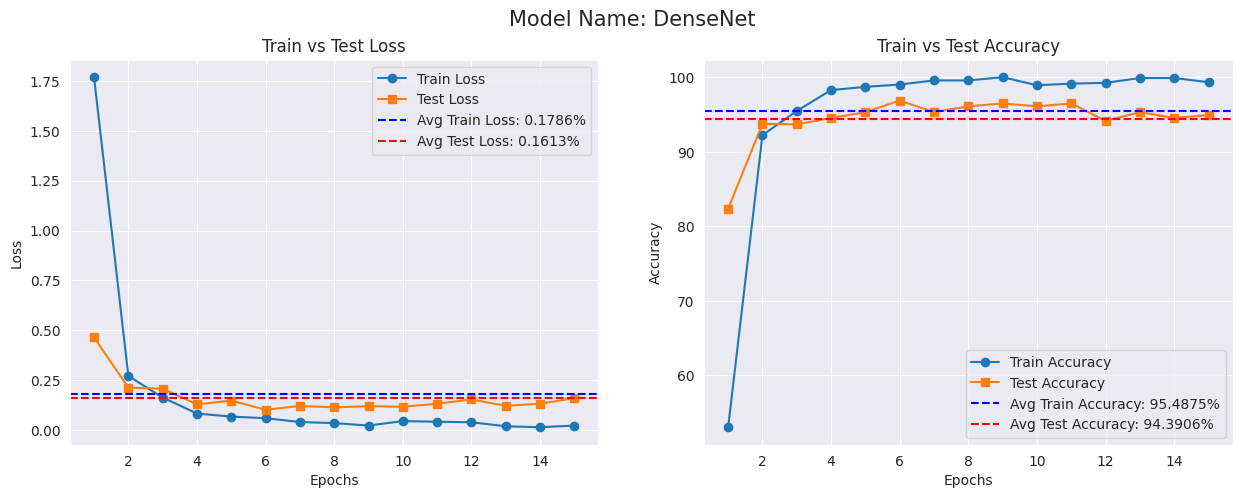

In [145]:
#Ploting The Result of the Model
plot_training_results(model_summary=model_summary, epochs=15)

## 📸 Real-World Image Prediction  

This section allows us to test our trained model on real-world images and evaluate its performance. The function `predicting_real_world_images` processes an image, runs inference through the model, and prints both the **predicted label** and the **actual label**.

---

### 🔍 **Function Details**  

### 🏷️ `predicting_real_world_images(model, image_path, actual_label, class_names)`
#### 📌 Description:  
Loads an image, applies transformations, runs it through the trained model, and prints the predicted class along with the actual label.

#### 🛠️ Parameters:  
| Parameter     | Type              | Description |
|--------------|------------------|-------------|
| `model`      | `torch.nn.Module` | Trained deep learning model |
| `image_path` | `str`             | Path to the real-world image file |
| `actual_label` | `str`           | The actual class label of the image |
| `class_names` | `list`           | List of class names corresponding to model output |

#### 🔄 Returns:  
- **Prints** the predicted and actual labels.

In [146]:
def predicting_real_world_images(model: torch.nn.Module, image_path: str, actual_label: str, class_names):
    """
    Predicts the label of a real-world image using a trained model.

    Args:
        model (torch.nn.Module): The trained deep learning model for classification.
        image_path (str): Path to the image file to be predicted.
        actual_label (str): The ground truth label of the image.
        class_names (list): List of class names corresponding to model output indices.

    Returns:
        None: Prints the predicted and actual labels.

    Example:
        predicting_real_world_images(model, "sample_image.jpg", "Eczema", class_names)
    """

    # Load the default transformation settings for DenseNet201 weights
    auto_transforms = torchvision.models.DenseNet201_Weights.DEFAULT.transforms()

    # Read the image, convert to float32, normalize, and apply transformations
    image = auto_transforms(torchvision.io.read_image(str(image_path)).type(torch.float32) / 255).to(device)

    # Set the model to evaluation mode (disables dropout, batchnorm updates)
    model.eval()

    # Disable gradient calculations for inference
    with torch.inference_mode():
        # Forward pass: Get the model's predicted class index
        prediction = torch.argmax(torch.softmax(model(image.unsqueeze(dim=0)), dim=1), dim=1)

    # Print predicted and actual labels
    print(f"Predicted Label: {class_names[prediction]}")
    print(f"Actual Label: {actual_label}")

In [147]:
# Prediction-1
predicting_real_world_images(model=model, image_path='BA-cellulitis.jpeg', actual_label='BA- cellulitis', class_names=class_names)

Predicted Label: BA- cellulitis
Actual Label: BA- cellulitis


In [148]:
# Prediction-2
predicting_real_world_images(model=model, image_path='FU-athlete-foot.jpeg', actual_label='FU-athlete-foot', class_names=class_names)

Predicted Label: BA- cellulitis
Actual Label: FU-athlete-foot


In [149]:
# Prediction-3
predicting_real_world_images(model=model, image_path='VI-chickenpox.jpg', actual_label='VI-chickenpox', class_names=class_names)

Predicted Label: VI-chickenpox
Actual Label: VI-chickenpox


## 💾 Model Saving

This section ensures that the trained model is properly saved for future use. The function `save_model` saves the model's state dictionary in a specified directory.

### 📌 **Function: `save_model(model, target_dir, model_name)`**

#### 📝 **Description**  
Saves a trained PyTorch model to a specified directory in `.pth` or `.pt` format.

#### 🛠️ **Parameters**
| Parameter   | Type              | Description |
|------------|------------------|-------------|
| `model`    | `torch.nn.Module` | The trained PyTorch model to save. |
| `target_dir` | `str` | Directory path where the model will be stored. |
| `model_name` | `str` | Name of the saved model file (must end with `.pth` or `.pt`). |

#### 🔄 **Returns**  
- **None** (Saves the model to disk).

#### 🚨 **Error Handling**  
- Ensures the `model_name` has a valid `.pth` or `.pt` extension.

In [150]:
import torch
import pathlib

def save_model(model: torch.nn.Module, target_dir: str, model_name: str):
    """
    Saves the trained model's state dictionary to the specified directory.

    Args:
        model (torch.nn.Module): The trained model to be saved.
        target_dir (str): The directory where the model will be saved.
        model_name (str): The name of the saved model file (should end with '.pth' or '.pt').

    Raises:
        AssertionError: If the model_name does not have a '.pth' or '.pt' extension.

    Example:
        save_model(model, "saved_models", "best_model.pth")
    """

    # Convert target directory to a Path object
    target_dir_path = pathlib.Path(target_dir)

    # Create the directory if it doesn't exist
    target_dir_path.mkdir(parents=True, exist_ok=True)

    # Ensure the model file has a valid extension
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "Model file must have a '.pth' or '.pt' extension."

    # Define full path for saving the model
    model_save_path = target_dir_path / model_name

    # Log the save location
    print(f"[INFO] Saving model to: {model_save_path}")

    # Save the model's state dictionary
    torch.save(obj=model.state_dict(), f=model_save_path)

In [151]:
# Saving the model
save_model(
    model=model, target_dir="Models/", model_name="model_1.pt"
)

[INFO] Saving model to: Models/model_1.pt
